In [169]:
# Time Serie Analysis : Step 1 --> Upload of data and check data accuracy.
# Upload of data base via csv file.
path2Tableau = r"C:\Users\guillaume_julie\Desktop\Python Project\Time_Series_Analysis\superstore_dataset2011-2015.csv"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(path2Tableau,encoding="ISO-8859-1")
#he read_csv() function is smart enough to decipher whether it's working with full or relative file paths and convert your flat file as a DataFrame without a problem.
df.head(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,9253,US-2014-134698,24-12-2014,31-12-2014,Standard Class,DP-13165,David Philippe,Consumer,Puerto La Cruz,Anzoátegui,...,OFF-ST-10001954,Office Supplies,Storage,"Rogers Shelving, Wire Frame",171.360,7,0.4,-34.300,15.86,Medium
1,20243,ES-2014-5710826,24-12-2014,31-12-2014,Standard Class,RH-19555,Ritsa Hightower,Consumer,Clichy-sous-Bois,Ile-de-France,...,OFF-BI-10001253,Office Supplies,Binders,"Acco Binder Covers, Recycled",68.400,5,0.0,20.400,6.93,Low
2,9256,US-2014-134698,24-12-2014,31-12-2014,Standard Class,DP-13165,David Philippe,Consumer,Puerto La Cruz,Anzoátegui,...,TEC-AC-10001728,Technology,Accessories,"SanDisk Flash Drive, Programmable",49.248,3,0.4,-8.232,4.27,Medium
3,9255,US-2014-134698,24-12-2014,31-12-2014,Standard Class,DP-13165,David Philippe,Consumer,Puerto La Cruz,Anzoátegui,...,OFF-ST-10001172,Office Supplies,Storage,"Fellowes Trays, Wire Frame",45.168,2,0.4,-21.832,3.11,Medium
4,9254,US-2014-134698,24-12-2014,31-12-2014,Standard Class,DP-13165,David Philippe,Consumer,Puerto La Cruz,Anzoátegui,...,OFF-EN-10004012,Office Supplies,Envelopes,"GlobeWeis Peel and Seal, Set of 50",59.892,7,0.4,8.932,2.57,Medium


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51004 entries, 0 to 51003
Data columns (total 24 columns):
Row ID            51004 non-null int64
Order ID          51004 non-null object
Order Date        51004 non-null object
Ship Date         51004 non-null object
Ship Mode         51004 non-null object
Customer ID       51004 non-null object
Customer Name     51004 non-null object
Segment           51004 non-null object
City              51004 non-null object
State             51004 non-null object
Country           51004 non-null object
Postal Code       9946 non-null float64
Market            51004 non-null object
Region            51004 non-null object
Product ID        51004 non-null object
Category          51004 non-null object
Sub-Category      51004 non-null object
Product Name      51004 non-null object
Sales             51004 non-null float64
Quantity          51004 non-null int64
Discount          51004 non-null float64
Profit            51004 non-null float64
Shipping C

In [171]:
# Time Serie Analysis : Step 2 --> Exploring monthly sales from 2011 to 2014
# The 'MS' string groups the data in buckets by start of the month
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
#df.dtypes
#df = df.set_index(['Ship Date'])
#df.loc['2011-01-01':'2014-12-31']
df = df.set_index('Ship Date')['Profit'].resample('MS').sum()
df

Ship Date
2011-01-01     7802.94024
2011-02-01    11509.17666
2011-03-01    19438.29608
2011-04-01     8947.33678
2011-05-01    10847.64566
2011-06-01    20030.95730
2011-07-01    12457.57496
2011-08-01    34310.89000
2011-09-01    35116.17618
2011-10-01    22567.76620
2011-11-01    29883.88510
2011-12-01    30718.32348
2012-01-01    19472.08856
2012-02-01    16482.13574
2012-03-01    22233.81774
2012-04-01    19765.75832
2012-05-01    29554.71536
2012-06-01    33469.35876
2012-07-01    19403.58678
2012-08-01    31144.84190
2012-09-01    28503.94540
2012-10-01    30951.02730
2012-11-01    23865.41716
2012-12-01    33376.12988
2013-01-01    34879.24958
2013-02-01    21517.67168
2013-03-01    16392.56848
2013-04-01    34163.00474
2013-05-01    28532.61684
2013-06-01    33707.38530
2013-07-01    30338.35726
2013-08-01    33228.05542
2013-09-01    36076.24228
2013-10-01    47402.16612
2013-11-01    44550.60172
2013-12-01    47312.44856
2014-01-01    36210.70148
2014-02-01    25871.09830
20

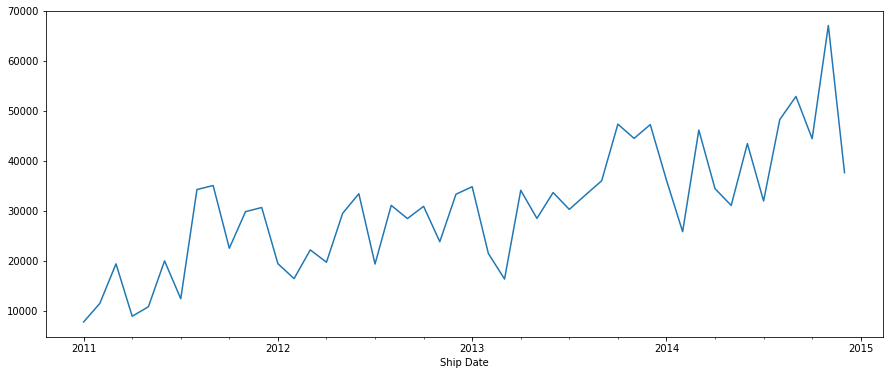

In [173]:
df.plot(figsize=(15, 6))
plt.show()

<Figure size 5400x2400 with 0 Axes>

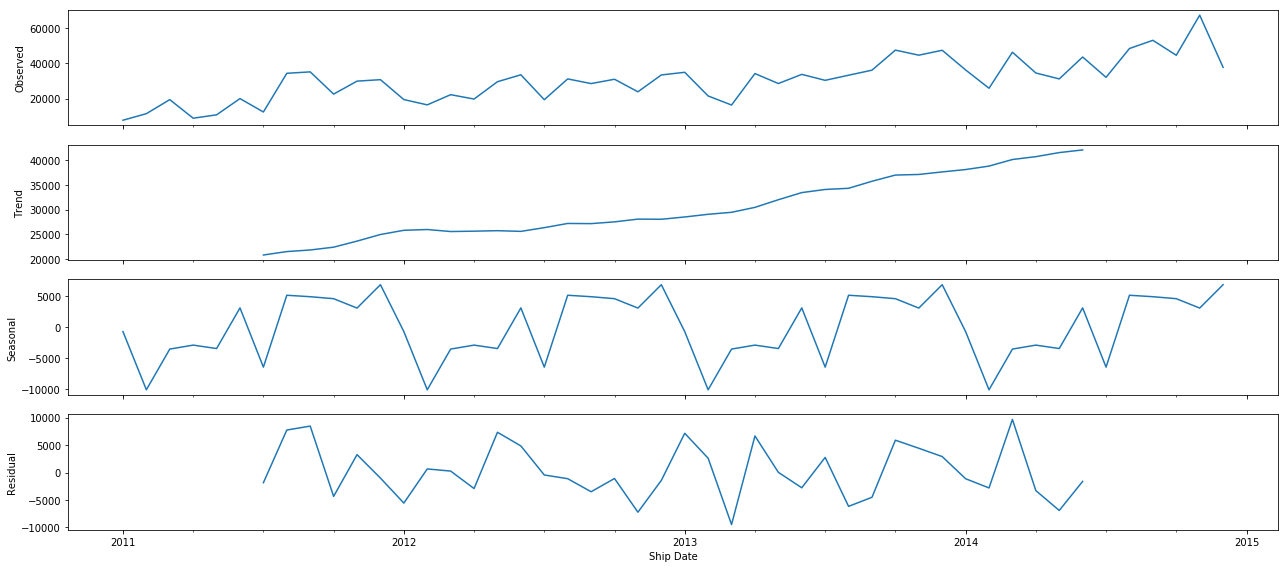

In [179]:
import statsmodels.api as sm
#statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration
plt.figure(figsize=(18, 8), dpi=300)
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()
# Observed: The average value in the series.
# Trend: The increasing or decreasing value in the series.
# Seasonality: The repeating short-term cycle in the series.
# Residual: The random variation in the series
# the residual in a time series model are what is left over after fitting a model
# Residuals are useful in checking whether a model has adequately captured the information in the data. A good forecasting method will yield residuals with the following properties:
    # The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.
    # The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.

In [ ]:
# Time Serie Analysis : Step 3 --> Time series forecasting with ARIMA
# ARIMA --> AutoregRessive Integrated Moving Average.  ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series
